# Dataset Exploration

### Libraries Importation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### Dataset Loading

In [2]:
irish_bank_data = pd.read_csv('./dataset/loan_final313.csv')
irish_bank_data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


### Dataset Shape Identification

In [3]:
irish_bank_data.shape

(887379, 30)

### Dataset Basic Information Identification

In [4]:
irish_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

Since there are no missing values, we can proceed to check are there any duplicated data.

### Duplicated Data Identification

In [5]:
irish_bank_data[irish_bank_data.duplicated(keep = False)]

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region


Since there are also no duplicated data, therefore we can proceed to feature selection by dropping any rendundant and other features we don't need.

We will proceed with bottom-up approach to see what insights we can get from this dataset.

We will proceed with these features:annual_inc, grade, total_rec_prncp, and loan_condition

### Feature Selection

In [6]:
irish_bank_data.drop(columns = ['id', 'year', 'issue_d', 'final_d',
                                'emp_length_int', 'home_ownership',
                                'home_ownership_cat', 'income_category',
                                'income_cat', 'loan_amount', 'term', 'term_cat',
                                'application_type', 'application_type_cat',
                                'purpose', 'purpose_cat', 'interest_payments',
                                'interest_payment_cat', 'loan_condition_cat',
                                'interest_rate', 'grade_cat', 'dti',
                                'total_pymnt', 'recoveries', 'installment',
                                'region'], inplace = True)
irish_bank_data.head()

,annual_inc,loan_condition,grade,total_rec_prncp
0,24000,Good Loan,B,5000.00
1,30000,Bad Loan,C,456.46
2,12252,Good Loan,C,2400.00
3,49200,Good Loan,C,10000.00
4,80000,Good Loan,B,2233.10


### Dataset Description

In [7]:
irish_bank_data.describe()

,annual_inc,total_rec_prncp
count,8.873790e+05,887379.000000
mean,7.502759e+04,5757.706424
std,6.469815e+04,6625.441046
min,0.000000e+00,0.000000
25%,4.500000e+04,1200.570000
50%,6.500000e+04,3215.320000
75%,9.000000e+04,8000.000000
max,9.500000e+06,35000.030000


### Dataset Correlation Matrix

In [8]:
irish_bank_data.corr()

,annual_inc,total_rec_prncp
annual_inc,1.000000,0.149993
total_rec_prncp,0.149993,1.000000


<AxesSubplot:>

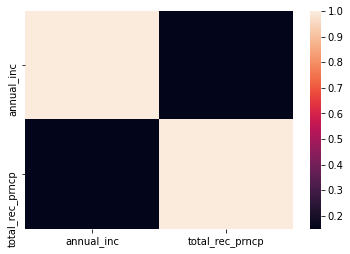

In [9]:
sns.heatmap(data = irish_bank_data.corr())

### Insights

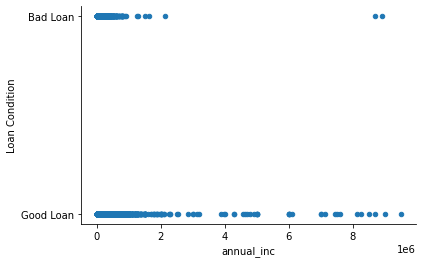

In [11]:
irish_bank_data.plot.scatter('annual_inc', 'loan_condition')
plt.ylabel("Loan Condition")
sns.despine()

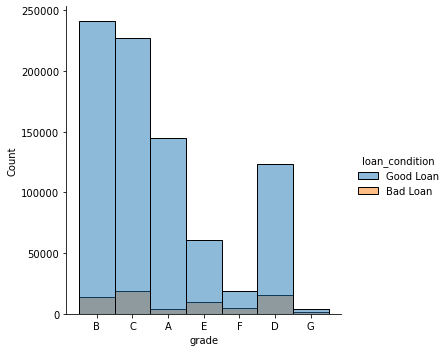

In [12]:
sns.displot(data = irish_bank_data, x = 'grade', hue = "loan_condition")

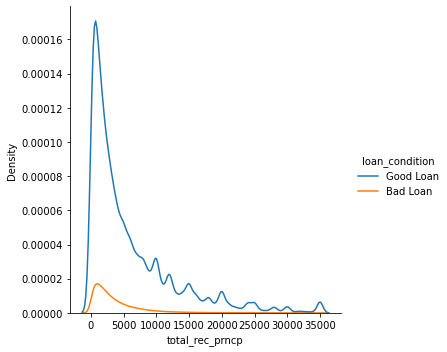

In [13]:
sns.displot(data = irish_bank_data, x = "total_rec_prncp", hue="loan_condition", kind = "kde")

# Classification Modelling

## Logistic Regression Algorithm

Logistics Regression Algorithm chosen because of its simplicity and ease of parameter tuning.

### Libraries Importation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
X = irish_bank_data['annual_inc'].values
y = irish_bank_data['loan_condition_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 10)
print(X_train, '\n')
print(y_train)

In [ ]:
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['Grain size (mm)'].reshape(-1, 1), df['Spiders'])
print(clf.intercept_, clf.coef_)

In [ ]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

In [ ]:
y_prediction = model.predict(X_test)

### Dataset Split

In [ ]:
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

### Model Pipeline Configuration

In [ ]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

### Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))